# Activity 4 - Isochrones & Cluster CMD's

In today's activity, we are going to be working with [MIST stellar evolution models](https://waps.cfa.harvard.edu/MIST/index.html) and star cluster data. MIST creates model isochrones to use in HR diagrams or color-magnitude diagrams (CMD's). The cluster data is Gaia magnitudes of stars in the Pleiades open cluster, so we're going to use the data and MIST models to determine its age and distance!

**Make sure to upload the data files for this activity to Colab so you can use them in the notebook:**

- "read_mist_models.py" - contains python functions needed to read in the MIST models
- "MIST_model.cmd" - contains the MIST model isochrone (may take a few minutes to upload)
- "Pleiades.csv" - contains Gaia photometry for many stars in the Pleiades cluster


In [ ]:
# Make sure you import the packages we need by running this cell
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
%matplotlib inline

# import package to read in MIST models
import read_mist_models

## Part 1 - Working with MIST isochrones

A model isochrone (".cmd") file contains some physical properties & synthetic photometry for stars of different masses and ages.

**Step 1** - Run the following cell to read in the model isocrhone file using a pre-written function.

In [ ]:
model_cmd = read_mist_models.ISOCMD('MIST_model.cmd')

**Step 2** - Run the following cell to print out some information about the models, such as the abundances, possible isochrone ages (in log10), and column names.

In [ ]:
print('abundances: ', model_cmd.abun)
print('log(age): ', [round(x,2) for x in model_cmd.ages])
print('columns: ', model_cmd.hdr_list)

a. What is the approximate range of isochrone ages available in the model?

b. What are two columns that tell us about the physical properties of the star?

c. What are two columns that tell us about the observed properties of the star?

Answer here:

\



**Step 3** - The model isochrone file contains the data for many different ages. Now let's practice grabbing the data for a single age.

I wrote a basic function to pull out the data for a specific age (given in years). Run this cell to activate the function.

In [ ]:
# This function will grab the isochrone whose age most
#    closely matches the requested age
def get_isochrone(age):
  # input = age in Gyr
  log_age = np.log10(age)
  age_ind = model_cmd.age_index(log_age)
  return model_cmd.isocmds[age_ind]


Then, enter an age for the cluster in the "age" variable in the cell below. Run the cell to plot the isocrhone for that age. Try a few different ages from 1 Myr to 10 Gyr to see how it changes.

In [ ]:
age =       # enter isochrone age in years

# use the function to get the isochrone we want
model = get_isochrone(age)

B = model['Bessell_B']
V = model['Bessell_V']
plt.plot(B-V, V)

# plot the isochrone on a color-magnitude diagram
plt.xlabel('B - V (mag)')
plt.ylabel('V (mag)')
plt.xlim(-0.5, 2.0)
plt.ylim(17, -10)
plt.show()

## Part 2 - Pleiades cluster

We're going to work with a CMD of the Pleiades open cluster using Gaia photometry for from [Heyl et al. 2022](https://ui.adsabs.harvard.edu/abs/2022ApJ...926..132H/abstract).  Gaia measures the apparent magnitude of each star in three filters:
- $B_p$ = a narrow blue filter
- $G$ = a wide green filter
- $R_p$ = a narrow red filter (see plot below).  

The file contains columns for the star's Gaia ID, coordinates, $G$ magnitude, and $B_p - R_p$ color.

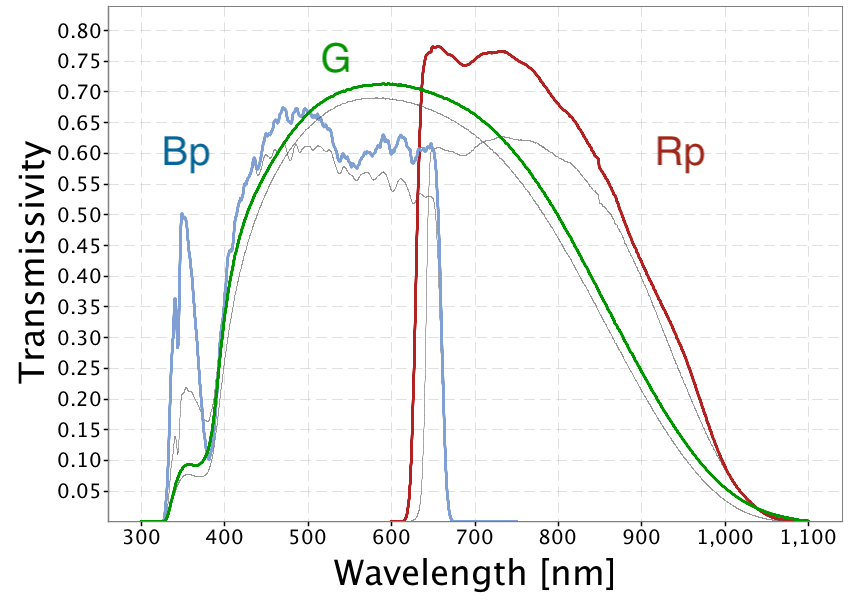

**Step 4** - First, let's read in the Gaia photometry from the CSV file using the astropy.ascii.read package. Write some code to read in the file and print  the data. (See Activity 2 part 1 for a reminder!)

In [ ]:
# read in & print the file here



**Step 5** - Next, pull out the columns that we want to use -- $G$ magnitude and $B_p - R_p$ color -- and put them into their own variables called "G_obs" and "color_obs". (Named with an "obs" suffix because they come from observations, rather than the MIST model.)

In [ ]:
# Pull out the columns we want to use:
G_obs =         # G magnitude
color_obs =     # Bp - Rp color


**Step 6** - Plot a color-magnitude diagram for this cluster:
- Plot the stars as black circles
- Add axis labels to something appropriate
- Change the y axis limits so brighter stars are at the top and fainter stars are at the bottom.

You should see a main sequence running diagonally acros the plot!

In [ ]:
# Plot CMD here




## Part 3 - Distance & Age of the Pleiades

Let's combine everything we've done so far to compare the observed and model CMD to measure the distance and age of the Pleiades cluster.

**Step 7** - In order to overplot a model isochrone, we need to pull out the model data for the $G$, $B_p$, and $R_p$ filters. (Rather than Bessel $B$ and $V$ like we used in Part 1). I've started the code for you, so now all you need to do is calculate the model $B_p - R_p$ color ("color_model").

In [ ]:
# Pull out the Gaia photometry from the MIST models into new variables
G_model = model['Gaia_G_EDR3']
Bp_model = model['Gaia_BP_EDR3']
Rp_model = model['Gaia_RP_EDR3']

# calculate the model color
color_model =


**Step 8** - Copy your code from Step 6 and overplot the model isochrone with the Pleiades data.

In [ ]:
# Enter code here



That doesn't match very well does it?

The models don't take into account the cluster's distance, so the model uses absolute magnitude instead of apparent magnitude. But, this allows us to calculate the distance to the Pleiades using the distance modulus!

\

**Step 9** - Remember that the distance modulus relates the apparent magnitude of a star ($m$), the absolute magnitude ($M$) and the distance ($d$):
$$m - M = 5 \log d - 5$$

Pick a main sequence star from the Pleiades cluster and read off it's a apparent $G$ magnitude. Enter it in the "m" variable below. Then read off the absolute $G$ magnitude of the isochrone *at the same color value* as the Pleiades star you chose. Enter it in the "M" variable, then calculate the cluster distance ("D") using the distance modulus.

In [ ]:
# Enter magnitudes here
m =
M =

# Calculate the cluster distance in parsecs
d =

print('Pleiades distance = ', d, ' parsecs')

**Step 10** - Use the distance to convert the model's absolute magnitudes ("G_model") to apparent magnitudes ("G_model_corrected").

In [ ]:
G_model_corrected =


Then copy your code from Step 8 and plot the model's corrected G magnitudes instead. The main sequences should line up now!

In [ ]:
# Enter code here



**Step 11** - Let's find the age of the Pleiades by fiding the isochrone that best fits the cluster data.
\

Here is a recap of everything we've done. Copy both cells from Step 10 into the end of the cell. Then run the cell using different isochrone ages and find the one that fits the Pleiades the best.

In [ ]:
# test differnt isochrone ages (in years)
age =

# use the function to get the isochrone we want
model = get_isochrone(age)

# Pull out the Gaia photometry from the MIST models into new variables
G_model = model['Gaia_G_EDR3']
Bp_model = model['Gaia_BP_EDR3']
Rp_model = model['Gaia_RP_EDR3']
color_model =  Bp_model - Rp_model

# copy code from Step 10 here





# print the age in Myr
print('Pleiades age = ', age/1e6, ' Million years')


## Bonus
If you have time, try plotting the CMD with isochrones for multiple ages at once. You can copy the cell above as a starting point, then try modifying it with a loop to overplot isochrones of different ages in the same plot. (For example, ages = 10^6, 10^8, and 10^10 years.)  Add a legend to label the age of each isochrone, and test the look of different plot colors and linestyles.

In [ ]:
# bonus code here




---

## Final instructions
Finish any remaining exercises, then **email your notebook to me by the end of class on Oct 26** to get participation credit. You can download your notebook as an ".ipynb" file and email it, or share the notebook with me through google drive.

\
Remember to answer the questions in Step 2.

\
If you're finishing the activity at home and run into python problems, don't worry about getting the code exactly right. This isn't a coding class and I'm not grading you on how well you know python. If you're stuck, add a text box and explain what you're trying to do *in words*. Then I'll know you have the right idea and know how to apply the content, even if the python code itself is not working. You're also welcome to stop by my office to ask coding questions anytime!